In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
row_data = pd.read_csv('data/data.csv')
data_unprocessed = row_data.copy()
data_unprocessed.head(10)

,Unnamed: 0,ID,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
0,0,157,AGR 556,SMG,primary,images/primary/AGR 556.jpg,25,37.0,47.0,75.0,98.0,47.0,NaN,NaN
1,1,9,AK-47,Assault,primary,images/primary/AK-47.jpg,33,67.0,58.0,55.0,74.0,44.0,NaN,NaN
2,2,11,AK117,Assault,primary,images/primary/AK117.jpg,25,62.0,45.0,77.0,75.0,46.0,NaN,NaN
3,3,174,AS VAL,Assault,primary,images/primary/AS VAL.jpg,28,44.0,50.0,80.0,83.0,47.0,NaN,NaN
4,4,14,ASM10,Assault,primary,images/primary/ASM10.jpg,34,72.0,48.0,55.0,68.0,52.0,NaN,NaN
5,5,20,Arctic .50,Sniper,primary,images/primary/Arctic .50.jpg,85,59.0,95.0,31.0,33.0,68.0,NaN,NaN
6,6,13,BK57,Assault,primary,images/primary/BK57.jpg,27,57.0,49.0,66.0,83.0,69.0,NaN,NaN
7,7,30,BY15,Shotgun,primary,images/primary/BY15.jpg,35x8,48.0,40.0,29.0,71.0,42.0,NaN,NaN
8,8,195,CR-56 AMAX,Assault,primary,NaN,25,50.0,51.0,71.0,76.0,51.0,NaN,NaN
9,9,4,Chicom,SMG,primary,images/primary/Chicom.jpg,27,63.0,43.0,62.0,105.0,57.0,NaN,NaN


Some adjustments in data

In [3]:
data_unprocessed = data_unprocessed.drop(['Unnamed: 0'], axis=1)

In [4]:
data_unprocessed=data_unprocessed.sort_values('ID')

In [5]:
data_unprocessed.set_index('ID',inplace=True, drop=True)
data_unprocessed

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
ID,,,,,,,,,,,,
1,RUS-79U,SMG,primary,images/primary/RUS-79U.jpg,28,51.0,44.0,77.0,98.0,50.0,NaN,NaN
2,MSMC,SMG,primary,images/primary/MSMC.jpg,25,37.0,41.0,92.0,113.0,27.0,NaN,NaN
3,HG 40,SMG,primary,images/primary/HG 40.jpg,26,59.0,48.0,67.0,100.0,50.0,NaN,NaN
4,Chicom,SMG,primary,images/primary/Chicom.jpg,27,63.0,43.0,62.0,105.0,57.0,NaN,NaN
5,PDW-57,SMG,primary,images/primary/PDW-57.jpg,27,49.0,44.0,75.0,100.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
214,R9-0,Shotgun,primary,NaN,17x12,49.0,38.0,34.0,86.0,42.0,NaN,NaN
216,M13,Assault,primary,NaN,24,56.0,56.0,88.0,72.0,43.0,NaN,NaN
218,Flash Drone,Tactical,throwable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,55.0


#### We'll only focus on Primary Weapon for now. so we create a different Dataframe with only parimary weapons and it's features

In [6]:
data_primary = data_unprocessed.loc[data_unprocessed['type'] == 'primary']
primary_columns = [ 'name', 'category', 'type', 'image', 'Damage', 'Accuracy',
       'Range', 'Fire Rate', 'Mobility', 'Control']
data_primary = data_primary[primary_columns]

In [7]:
print(data_primary['type'].unique())
print(data_primary.shape)

['primary']
(61, 10)


In [8]:
# check for any weapon metrics is null in Primary Data Frame
check_columns = ['Damage', 'Accuracy','Range', 'Fire Rate', 'Mobility', 'Control']
data_primary[check_columns].isnull().values.any()

False

In [9]:
# List out all weapons category in primary Data Frame
weapons_category = data_primary['category'].unique()
print(len(weapons_category))
print(weapons_category)

6
['SMG' 'Assault' 'Sniper' 'LMG' 'Shotgun' 'Marksman']


In [10]:
# check for all the data types of columns
data_primary.dtypes

name          object
category      object
type          object
image         object
Damage        object
Accuracy     float64
Range        float64
Fire Rate    float64
Mobility     float64
Control      float64
dtype: object

Looks like we have damage in string, Due to how it was mentioned for shotguns. 
I cross verified with game as well, it is exactly how it's writtern there.

In [11]:
# Checking for Shortgun data for type missmatches
category='Shotgun'
print(data_primary.loc[data_primary['category'] == category].shape)
data_primary.loc[data_primary['category'] == category]


(7, 10)


,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control
ID,,,,,,,,,,
28,HS0405,Shotgun,primary,images/primary/HS0405.jpg,39x10,45.0,37.0,27.0,74.0,42.0
29,Striker,Shotgun,primary,images/primary/Striker.jpg,17x8,49.0,34.0,38.0,73.0,42.0
30,BY15,Shotgun,primary,images/primary/BY15.jpg,35x8,48.0,40.0,29.0,71.0,42.0
31,HS2126,Shotgun,primary,images/primary/HS2126.jpg,15x8,40.0,33.0,38.0,71.0,38.0
47,KRM 262,Shotgun,primary,images/primary/KRM 262.jpg,36x8,51.0,39.0,28.0,73.0,42.0
148,Echo,Shotgun,primary,images/primary/Echo.jpg,21x8,49.0,36.0,35.0,82.0,42.0
214,R9-0,Shotgun,primary,NaN,17x12,49.0,38.0,34.0,86.0,42.0


In [12]:
# looks like Shotgun has damage written as multiple eg : '36x10'
# we split string using 'x', convert rest of the number to int
# if the string doesn't contain 'x' we'll convert it's type to int
def SplitDamageString(damage):
    damage = str(damage)
    if 'x' in damage:
        damage=damage.split('x')
        return (int(damage[0])*int(damage[1]))
    else:
        return (int(damage))

data_primary['Damage'] = data_primary.apply(lambda x: SplitDamageString(x['Damage']), axis=1)
data_primary

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control
ID,,,,,,,,,,
1,RUS-79U,SMG,primary,images/primary/RUS-79U.jpg,28,51.0,44.0,77.0,98.0,50.0
2,MSMC,SMG,primary,images/primary/MSMC.jpg,25,37.0,41.0,92.0,113.0,27.0
3,HG 40,SMG,primary,images/primary/HG 40.jpg,26,59.0,48.0,67.0,100.0,50.0
4,Chicom,SMG,primary,images/primary/Chicom.jpg,27,63.0,43.0,62.0,105.0,57.0
5,PDW-57,SMG,primary,images/primary/PDW-57.jpg,27,49.0,44.0,75.0,100.0,50.0
...,...,...,...,...,...,...,...,...,...,...
207,MX9,SMG,primary,NaN,30,45.0,41.0,86.0,95.0,40.0
210,Hades,LMG,primary,NaN,29,57.0,53.0,65.0,55.0,60.0
214,R9-0,Shotgun,primary,NaN,204,49.0,38.0,34.0,86.0,42.0


In [13]:
# check for all the data types of columns
data_primary.dtypes

name          object
category      object
type          object
image         object
Damage         int64
Accuracy     float64
Range        float64
Fire Rate    float64
Mobility     float64
Control      float64
dtype: object

## Model Creation - Clustering

Ranking all types of weapons together is not the best Idea. Since different weapons can be used in different scenarios. 
- A shotgun can be really good for short distance instant kill
- A sniper can be useful at long distance sneaky shots
- Neither of them is good for medium range cross fire which involves movements.

We will check for best number of clusters we can form out of these metrices. and we'll try to fit those clusters into best scenarios and rank within clusters

In [14]:
# for Model creation, we're going to take only relevent columns
# we'll take these as input parameters and later we'll merge this to dataFrame
data_primary.columns.values

array(['name', 'category', 'type', 'image', 'Damage', 'Accuracy', 'Range',
       'Fire Rate', 'Mobility', 'Control'], dtype=object)

In [15]:
input_columns=['Damage', 'Accuracy', 'Range',
       'Fire Rate', 'Mobility', 'Control']

# Converting input to numpy array

X_input = data_primary[input_columns].to_numpy()


In [16]:
# Standardising Input array

scaler = preprocessing.StandardScaler().fit(X_input)
X_scaled = scaler.transform(X_input)
X_scaled

array([[-4.44181662e-01, -4.84071282e-01, -6.89523234e-01,
         9.11611821e-01,  1.13527328e+00,  2.61620818e-01],
       [-4.86783992e-01, -1.73300444e+00, -8.62139857e-01,
         1.65174032e+00,  1.81155913e+00, -1.96294892e+00],
       [-4.72583215e-01,  2.29604808e-01, -4.59367736e-01,
         4.18192823e-01,  1.22544473e+00,  2.61620818e-01],
       [-4.58382439e-01,  5.86442853e-01, -7.47062108e-01,
         1.71483324e-01,  1.45087334e+00,  9.38663783e-01],
       [-4.58382439e-01, -6.62490305e-01, -6.89523234e-01,
         8.12928021e-01,  1.22544473e+00,  2.61620818e-01],
       [-3.58977004e-01, -6.62490305e-01, -7.47062108e-01,
         4.67534723e-01,  1.31561618e+00, -8.02303841e-01],
       [-4.44181662e-01,  4.97233341e-01, -3.44289987e-01,
         7.27995243e-02,  1.00001612e+00,  1.13210463e+00],
       [-4.72583215e-01,  4.08023830e-01, -1.14134489e-01,
         2.20825224e-01,  2.33558827e-01,  3.58341241e-01],
       [-3.73177780e-01,  9.43280898e-01,  1.160

### Clustering

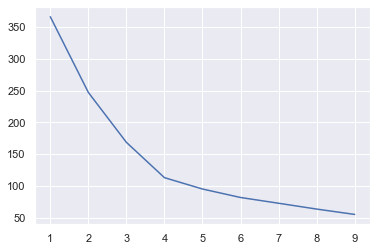

In [17]:
# checking for Elbow methods for best value for 'n', for clustering
wcss = []
n = range(1,10)
for i in n:
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(n,wcss)
plt.show()

In [18]:
# n = 4 works best as our analysis. 
# we'll traing our model with 4 clusters


kmeans = KMeans(4)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [19]:
predict = kmeans.predict(X_scaled)

In [20]:
# check if output number is same as the number of input
print(len(predict))
print(len(X_input))

61
61


In [22]:
# we'll assign the cluster to Data Frame and use visualization for conclusion
data_primary['cluster'] = predict
data_primary

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster
ID,,,,,,,,,,,
1,RUS-79U,SMG,primary,images/primary/RUS-79U.jpg,28,51.0,44.0,77.0,98.0,50.0,1
2,MSMC,SMG,primary,images/primary/MSMC.jpg,25,37.0,41.0,92.0,113.0,27.0,1
3,HG 40,SMG,primary,images/primary/HG 40.jpg,26,59.0,48.0,67.0,100.0,50.0,2
4,Chicom,SMG,primary,images/primary/Chicom.jpg,27,63.0,43.0,62.0,105.0,57.0,2
5,PDW-57,SMG,primary,images/primary/PDW-57.jpg,27,49.0,44.0,75.0,100.0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...
207,MX9,SMG,primary,NaN,30,45.0,41.0,86.0,95.0,40.0,1
210,Hades,LMG,primary,NaN,29,57.0,53.0,65.0,55.0,60.0,2
214,R9-0,Shotgun,primary,NaN,204,49.0,38.0,34.0,86.0,42.0,3


## Understanding the Clusters

In [23]:
print('Weapons types in Cluster 0 :', data_primary[data_primary['cluster']==0]['category'].unique())
print('Weapons types in Cluster 1 :', data_primary[data_primary['cluster']==1]['category'].unique())
print('Weapons types in Cluster 2 :', data_primary[data_primary['cluster']==2]['category'].unique())
print('Weapons types in Cluster 3 :', data_primary[data_primary['cluster']==3]['category'].unique())

Weapons types in Cluster 0 : ['Sniper' 'Marksman']
Weapons types in Cluster 1 : ['SMG' 'Assault' 'LMG']
Weapons types in Cluster 2 : ['SMG' 'Assault' 'LMG' 'Marksman']
Weapons types in Cluster 3 : ['Shotgun']


In [26]:
shotgun = 3
sniper = 0
assault1 = 1
assault2 = 2
labels = ['Sniper','Assault1','Assault2','Shotgun']

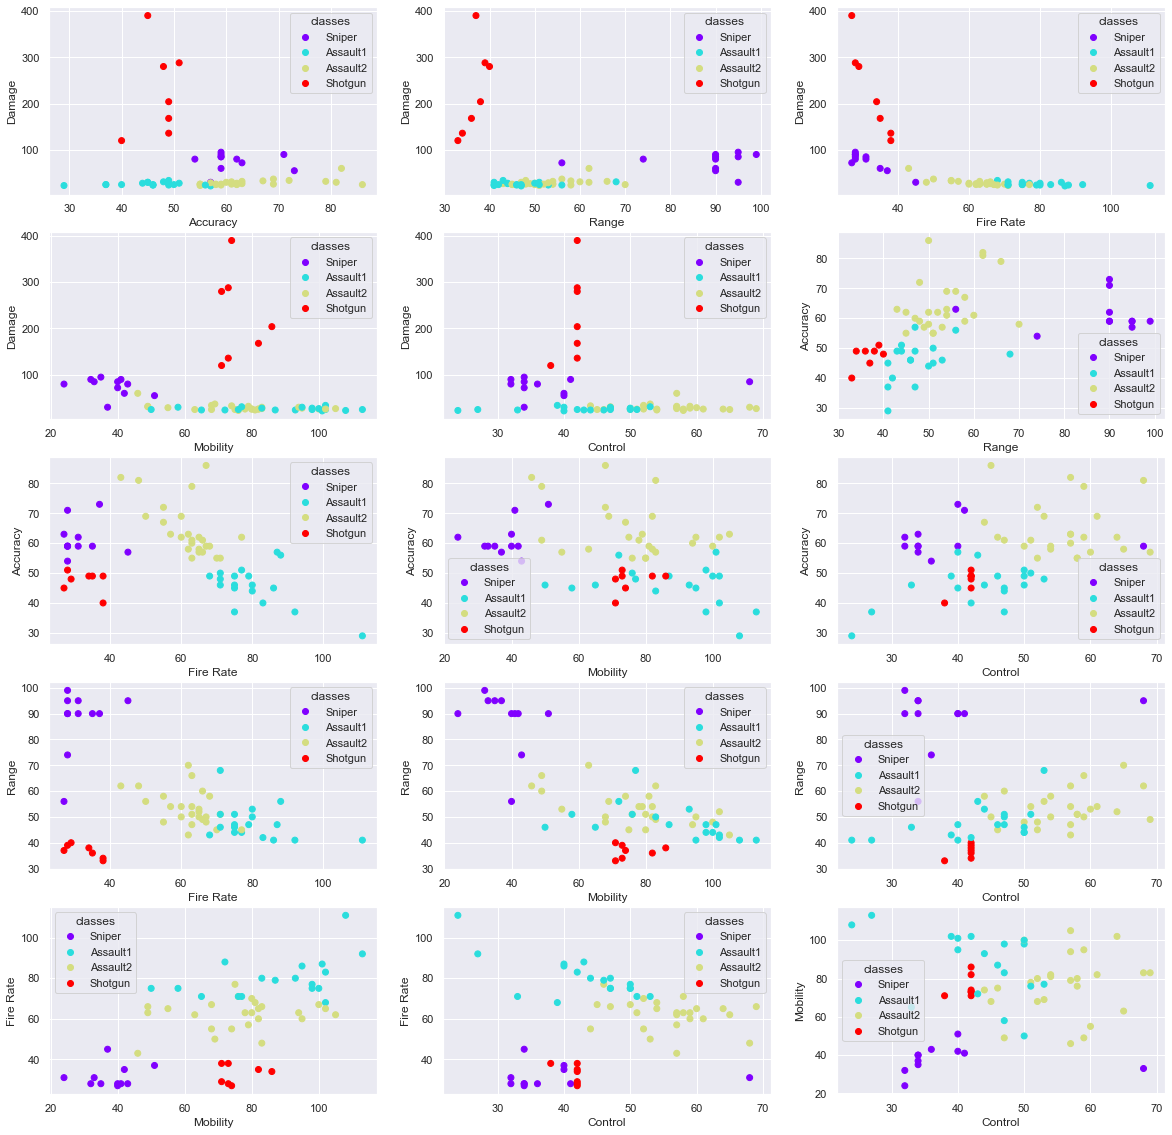

In [27]:
mats = ['Damage', 'Accuracy', 'Range',
       'Fire Rate', 'Mobility', 'Control']
cnt = 0
plt.figure(figsize=(20,20))
for i in range(len(mats)):
    for j in range(len(mats)):
        if i<j:
            cnt = cnt+1
            plt.subplot(5,3,cnt)
                        
            x = data_primary[mats[j]].to_numpy().astype(float)
            y = data_primary[mats[i]].to_numpy().astype(float)
            scatter = plt.scatter(x,y, c=predict, cmap='rainbow')
            plt.xlabel(mats[j])
            plt.ylabel(mats[i])
            plt.legend(handles=scatter.legend_elements()[0],labels=labels, title="classes")

          
plt.show()

In [28]:
data_primary[data_primary['cluster']==sniper]

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster
ID,,,,,,,,,,,
18,Locus,Sniper,primary,images/primary/Locus.jpg,95,59.0,95.0,28.0,35.0,34.0,0
19,Outlaw,Sniper,primary,images/primary/Outlaw.jpg,90,71.0,90.0,28.0,41.0,41.0,0
20,Arctic .50,Sniper,primary,images/primary/Arctic .50.jpg,85,59.0,95.0,31.0,33.0,68.0,0
21,DL Q33,Sniper,primary,images/primary/DL Q33.jpg,90,59.0,99.0,28.0,32.0,32.0,0
22,M21 EBR,Sniper,primary,images/primary/M21 EBR.jpg,60,59.0,90.0,35.0,42.0,40.0,0
23,XPR-50,Sniper,primary,images/primary/XPR-50.jpg,55,73.0,90.0,37.0,51.0,40.0,0
139,Kilo Bolt-Action,Marksman,primary,images/primary/Kilo Bolt-Action.jpg,85,59.0,90.0,28.0,40.0,34.0,0
152,NA-45,Sniper,primary,images/primary/NA-45.jpg,30,57.0,95.0,45.0,37.0,34.0,0
175,SP-R 208,Marksman,primary,images/primary/SP-R 208.jpg,72,63.0,56.0,27.0,40.0,34.0,0


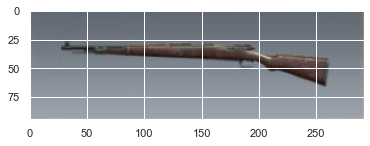

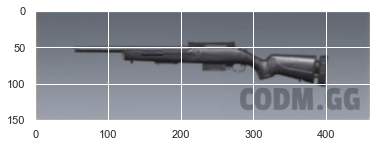

In [29]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('data/images/primary/Kilo Bolt-Action.jpg'))
plt.show()
plt.imshow(mpimg.imread('data/images/primary/SP-R 208.jpg'))
plt.show()


- Cluster 3 perfectly grouped all the shortguns
- Cluster 0 on exploring all Snipers are listed, along with 3 Marksman. 
- on Close checking the listed marksman is similar to snipers

So we can say so far we're good

#### Assault 1 and Assualt 2 clusters need a close examination

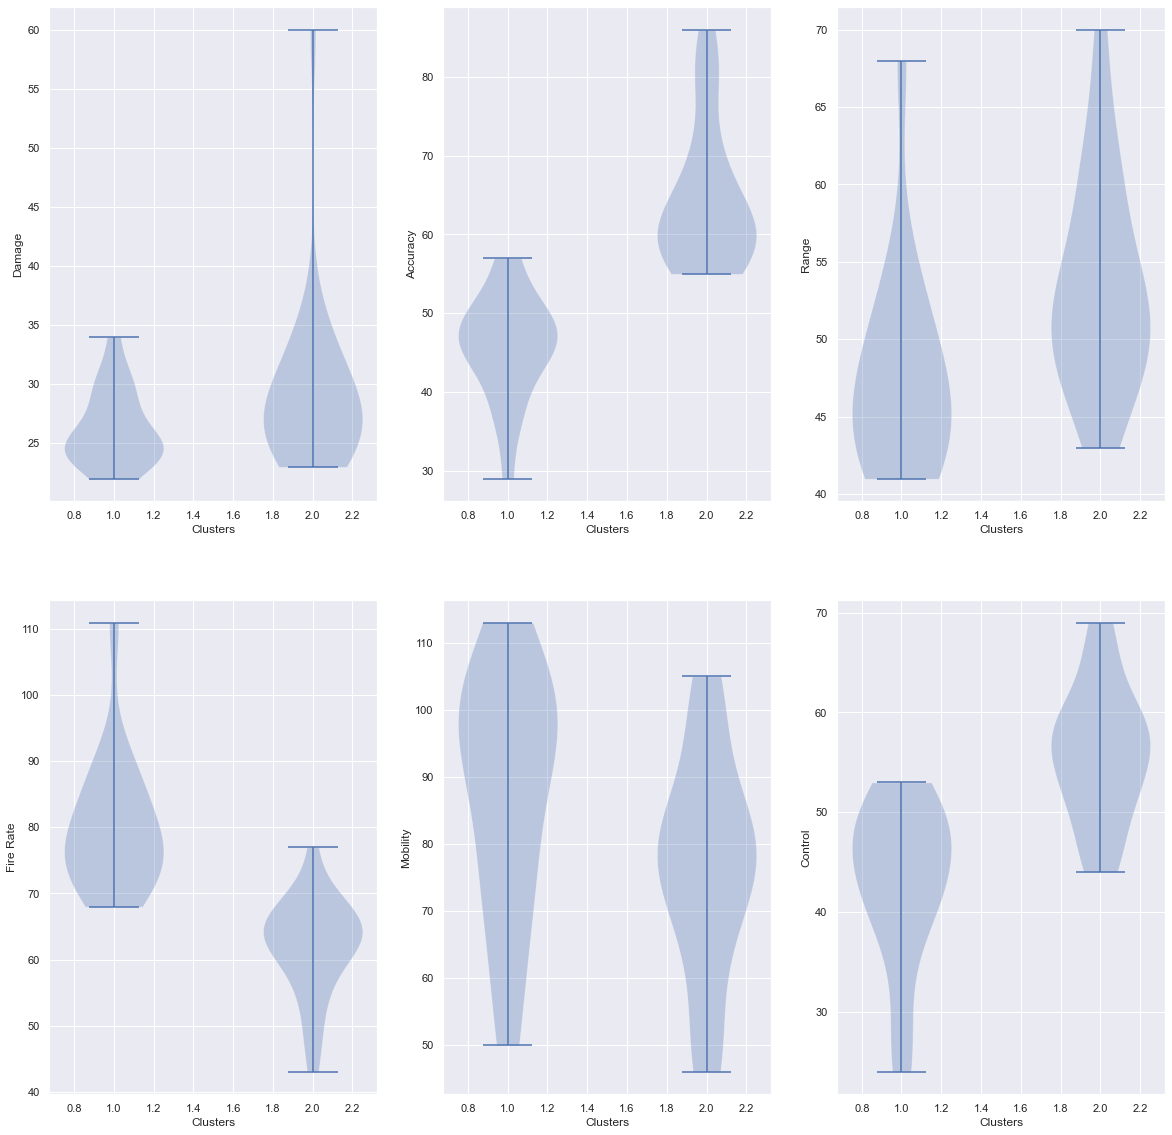

In [30]:
cnt=0
plt.figure(figsize=(20,20))
for i in mats:
    cnt=cnt+1
    plt.subplot(2,3,cnt)
    plt.violinplot(dataset = [
        data_primary[data_primary['cluster']==assault1][i].to_numpy().astype(float),
        data_primary[data_primary['cluster']==assault2][i].to_numpy().astype(float)
    ])
    plt.xlabel('Clusters')
    plt.ylabel(i)
plt.show()

#### Analysis

Though Assault 2 shows damage ranges from 60-25, most of the weapons are in similar range to Assault 1
Cluster Assault 2 shows great in accuracy, where as Assault 1 shows accuracy lower than Assault 2 range.
Range and mobility doesn't have much impact on either clusters, but still Assault 2 has slightly higher range where Assault 1 has slightly higher mobility
Assault 2 shows low fire Rate but Higher control, where Assault 1 higher fire rate but low control


#### Conclusion

Though Assault 1 has high firing rate, Assault 2 has advantage over control and accuracy
Assault 1 might has slight advantage over mobility, Assault 2 may b better with range.

Even though Assault 2 shows some weapons with high damage, if the firing rate is lower it will not do much good
For better understanding we will create a new variable combining firing rate and damage as damage per second.
Since firing rate is showing great difference, damage per second will give clear picture if the weapon has any advantage in killing streaks

In [31]:
damage_per_second = data_primary['Fire Rate']*data_primary['Damage']
data_primary['dps']=damage_per_second

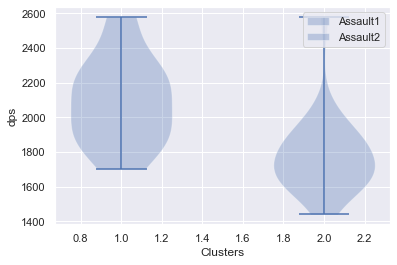

<Figure size 432x288 with 0 Axes>

In [32]:
dataset = [
        data_primary[data_primary['cluster']==assault1]['dps'].to_numpy().astype(float),
        data_primary[data_primary['cluster']==assault2]['dps'].to_numpy().astype(float)]
ax = plt.subplot(111)
plt.violinplot(dataset)
plt.xlabel('Clusters')
plt.ylabel('dps')
plt.figure()
label=['Assault1','Assault2']
ax.legend(label)
plt.show()


Looks like there's a high chance a weapon from Assault 2 cluster will have more damage than Assault 1 cluster.
Below plot Accuracy, Mobility and Control scatter plots. and Assualt 2 is showing almost always in top right corner

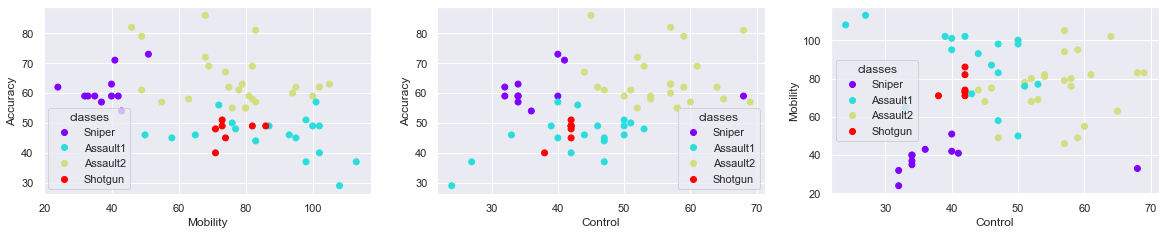

In [34]:
mats2 = [ 'Accuracy', 'Mobility', 'Control']
cnt = 0
plt.figure(figsize=(20,20))
for i in range(len(mats2)):
    for j in range(len(mats2)):
        if i<j:
            cnt = cnt+1
            plt.subplot(5,3,cnt)
                        
            x = data_primary[mats2[j]].to_numpy().astype(float)
            y = data_primary[mats2[i]].to_numpy().astype(float)
            predict = data_primary['cluster'].to_numpy().astype(float)
            scatter = plt.scatter(x,y, c=predict, cmap='rainbow')
            plt.xlabel(mats2[j])
            plt.ylabel(mats2[i])
            plt.legend(handles=scatter.legend_elements()[0],labels=labels, title="classes")

          

The Next step we have to follow is to rank the Weapons in each particular cluster.
For ranking we only have features no labels or weights. 
We currently have DPS, Accuracy, Range, Mobility and Control.
Out of which DPS, Accuracy and Range are directly associated with the weapon. which a player cannot influence
Where as Mobility and Control can be adjusted by the player ( methods like 4 claw and switching to secondary while running are examples ).
So for DPA, Accuracy and Range we'll provide weight 2 and for Mobility and Control we'll provide weight 1 to achieve a simple ranking system

In [35]:
R_columns = ['dps', 'Accuracy', 'Range', 'Mobility', 'Control']
R_input = data_primary[R_columns]
R_input

,dps,Accuracy,Range,Mobility,Control
ID,,,,,
1,2156.0,51.0,44.0,98.0,50.0
2,2300.0,37.0,41.0,113.0,27.0
3,1742.0,59.0,48.0,100.0,50.0
4,1674.0,63.0,43.0,105.0,57.0
5,2025.0,49.0,44.0,100.0,50.0
...,...,...,...,...,...
207,2580.0,45.0,41.0,95.0,40.0
210,1885.0,57.0,53.0,55.0,60.0
214,6936.0,49.0,38.0,86.0,42.0


In [36]:
R_input = R_input.to_numpy()
R_input

array([[ 2156.,    51.,    44.,    98.,    50.],
       [ 2300.,    37.,    41.,   113.,    27.],
       [ 1742.,    59.,    48.,   100.,    50.],
       [ 1674.,    63.,    43.,   105.,    57.],
       [ 2025.,    49.,    44.,   100.,    50.],
       [ 2312.,    49.,    43.,   102.,    39.],
       [ 1680.,    62.,    50.,    95.,    59.],
       [ 1638.,    61.,    54.,    78.,    51.],
       [ 1815.,    67.,    58.,    74.,    44.],
       [ 1632.,    59.,    58.,    81.,    54.],
       [ 1925.,    62.,    45.,    75.,    46.],
       [ 1896.,    49.,    47.,    87.,    46.],
       [ 1782.,    57.,    49.,    83.,    69.],
       [ 1870.,    72.,    48.,    68.,    52.],
       [ 1440.,    81.,    62.,    83.,    68.],
       [ 1633.,    55.,    51.,    76.,    58.],
       [ 1638.,    55.,    51.,    80.,    58.],
       [ 2660.,    59.,    95.,    35.,    34.],
       [ 2520.,    71.,    90.,    41.,    41.],
       [ 2635.,    59.,    95.,    33.,    68.],
       [ 2520.,    5

In [37]:
# Standardising using Min Max scaler to avoid -ve number

Rscaler = preprocessing.MinMaxScaler().fit(R_input)
R_scaled = Rscaler.transform(R_input)
R_scaled

array([[0.08779956, 0.38596491, 0.16666667, 0.83146067, 0.57777778],
       [0.10348584, 0.14035088, 0.12121212, 1.        , 0.06666667],
       [0.04270153, 0.52631579, 0.22727273, 0.85393258, 0.57777778],
       [0.03529412, 0.59649123, 0.15151515, 0.91011236, 0.73333333],
       [0.07352941, 0.35087719, 0.16666667, 0.85393258, 0.57777778],
       [0.10479303, 0.35087719, 0.15151515, 0.87640449, 0.33333333],
       [0.03594771, 0.57894737, 0.25757576, 0.79775281, 0.77777778],
       [0.03137255, 0.56140351, 0.31818182, 0.60674157, 0.6       ],
       [0.05065359, 0.66666667, 0.37878788, 0.56179775, 0.44444444],
       [0.03071895, 0.52631579, 0.37878788, 0.64044944, 0.66666667],
       [0.06263617, 0.57894737, 0.18181818, 0.57303371, 0.48888889],
       [0.05947712, 0.35087719, 0.21212121, 0.70786517, 0.48888889],
       [0.04705882, 0.49122807, 0.24242424, 0.66292135, 1.        ],
       [0.05664488, 0.75438596, 0.22727273, 0.49438202, 0.62222222],
       [0.00980392, 0.9122807 , 0.

In [38]:
R_scaled.shape

(61, 5)

In [40]:
weights = np.array([2,2,2,1,1])
weights.shape

(5,)

In [41]:
score = np.dot(R_scaled,weights)
score = np.around(score, decimals=3, out=None)
score

array([2.69 , 1.797, 3.024, 3.21 , 2.614, 2.424, 3.32 , 3.029, 3.198,
       3.179, 2.709, 2.442, 3.224, 3.193, 4.364, 2.859, 2.905, 3.563,
       4.025, 4.29 , 3.575, 3.501, 4.079, 2.885, 3.532, 2.196, 3.958,
       3.644, 2.514, 3.282, 1.925, 3.56 , 3.367, 2.546, 3.359, 2.63 ,
       3.149, 2.093, 1.975, 3.284, 3.406, 2.831, 1.448, 3.23 , 2.162,
       2.75 , 2.925, 3.547, 3.987, 2.409, 2.421, 3.573, 2.794, 3.153,
       2.559, 3.309, 2.225, 2.853, 3.167, 2.772, 1.728])

In [42]:
data_primary['score'] = score

In [43]:
data_primary

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster,dps,score
ID,,,,,,,,,,,,,
1,RUS-79U,SMG,primary,images/primary/RUS-79U.jpg,28,51.0,44.0,77.0,98.0,50.0,1,2156.0,2.690
2,MSMC,SMG,primary,images/primary/MSMC.jpg,25,37.0,41.0,92.0,113.0,27.0,1,2300.0,1.797
3,HG 40,SMG,primary,images/primary/HG 40.jpg,26,59.0,48.0,67.0,100.0,50.0,2,1742.0,3.024
4,Chicom,SMG,primary,images/primary/Chicom.jpg,27,63.0,43.0,62.0,105.0,57.0,2,1674.0,3.210
5,PDW-57,SMG,primary,images/primary/PDW-57.jpg,27,49.0,44.0,75.0,100.0,50.0,1,2025.0,2.614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,MX9,SMG,primary,NaN,30,45.0,41.0,86.0,95.0,40.0,1,2580.0,2.225
210,Hades,LMG,primary,NaN,29,57.0,53.0,65.0,55.0,60.0,2,1885.0,2.853
214,R9-0,Shotgun,primary,NaN,204,49.0,38.0,34.0,86.0,42.0,3,6936.0,3.167


In [44]:
primary_with_score=data_primary

In [45]:
#we'll split the dataframe cluster wise and we'll see for best weapons in each cluster

sniperDF = primary_with_score[primary_with_score['cluster']==sniper].sort_values('score',ascending=False)
shotgunDF = primary_with_score[primary_with_score['cluster']==shotgun].sort_values('score',ascending=False)
Assault1DF = primary_with_score[primary_with_score['cluster']==assault1].sort_values('score',ascending=False)
Assault2DF = primary_with_score[primary_with_score['cluster']==assault2].sort_values('score',ascending=False)


In [46]:
sniperDF.head()

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster,dps,score
ID,,,,,,,,,,,,,
20,Arctic .50,Sniper,primary,images/primary/Arctic .50.jpg,85,59.0,95.0,31.0,33.0,68.0,0,2635.0,4.290
23,XPR-50,Sniper,primary,images/primary/XPR-50.jpg,55,73.0,90.0,37.0,51.0,40.0,0,2035.0,4.079
19,Outlaw,Sniper,primary,images/primary/Outlaw.jpg,90,71.0,90.0,28.0,41.0,41.0,0,2520.0,4.025
21,DL Q33,Sniper,primary,images/primary/DL Q33.jpg,90,59.0,99.0,28.0,32.0,32.0,0,2520.0,3.575
18,Locus,Sniper,primary,images/primary/Locus.jpg,95,59.0,95.0,28.0,35.0,34.0,0,2660.0,3.563


In [47]:
shotgunDF.head()

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster,dps,score
ID,,,,,,,,,,,,,
28,HS0405,Shotgun,primary,images/primary/HS0405.jpg,390,45.0,37.0,27.0,74.0,42.0,3,10530.0,3.644
47,KRM 262,Shotgun,primary,images/primary/KRM 262.jpg,288,51.0,39.0,28.0,73.0,42.0,3,8064.0,3.367
30,BY15,Shotgun,primary,images/primary/BY15.jpg,280,48.0,40.0,29.0,71.0,42.0,3,8120.0,3.282
214,R9-0,Shotgun,primary,NaN,204,49.0,38.0,34.0,86.0,42.0,3,6936.0,3.167
148,Echo,Shotgun,primary,images/primary/Echo.jpg,168,49.0,36.0,35.0,82.0,42.0,3,5880.0,2.831


In [51]:
Assault1DF.head()

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster,dps,score
ID,,,,,,,,,,,,,
191,Holger 26,LMG,primary,NaN,31,48.0,68.0,71.0,77.0,53.0,1,2201.0,3.153
216,M13,Assault,primary,NaN,24,56.0,56.0,88.0,72.0,43.0,1,2112.0,2.772
163,QXR,SMG,primary,images/primary/QXR.jpg,22,57.0,47.0,87.0,101.0,40.0,1,1914.0,2.750
1,RUS-79U,SMG,primary,images/primary/RUS-79U.jpg,28,51.0,44.0,77.0,98.0,50.0,1,2156.0,2.690
5,PDW-57,SMG,primary,images/primary/PDW-57.jpg,27,49.0,44.0,75.0,100.0,50.0,1,2025.0,2.614


In [52]:
Assault2DF.head()

,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,cluster,dps,score
ID,,,,,,,,,,,,,
15,M16,Assault,primary,images/primary/M16.jpg,30,81.0,62.0,48.0,83.0,68.0,2,1440.0,4.364
171,SKS,Marksman,primary,images/primary/SKS.jpg,60,82.0,62.0,43.0,46.0,57.0,2,2580.0,3.987
27,M4LMG,LMG,primary,images/primary/M4LMG.jpg,32,79.0,66.0,63.0,49.0,59.0,2,2016.0,3.958
180,PP19 Bizon,SMG,primary,images/primary/PP19 Bizon.jpg,26,62.0,52.0,65.0,102.0,64.0,2,1690.0,3.573
46,ICR-1,Assault,primary,images/primary/ICR-1.jpg,26,69.0,54.0,60.0,82.0,61.0,2,1560.0,3.560


Best Assault 2 Weapon : M16


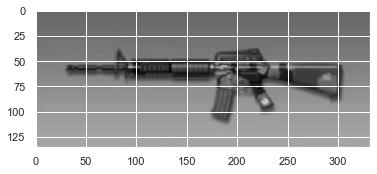

Best Assault 1 Weapon : Holger 26, [image not available]
Best Sniper : Artic 50


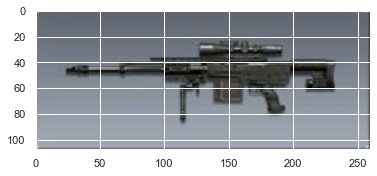

Best Shotgun : HS0405


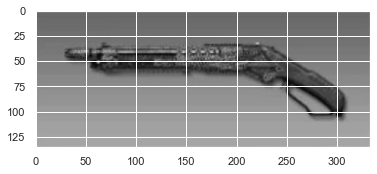

In [55]:
print('Best Assault 2 Weapon : M16')
plt.imshow(mpimg.imread('data/images/primary/M16.jpg'))
plt.show()
print('Best Assault 1 Weapon : Holger 26, [image not available]')


print('Best Sniper : Artic 50')
plt.imshow(mpimg.imread('data/images/primary/Arctic .50.jpg'))
plt.show()


print('Best Shotgun : HS0405')
plt.imshow(mpimg.imread('data/images/primary/HS0405.jpg'))
plt.show()

### Conclusion

- Even though it was really fun to play with these data and figure out the best weapon. This data is not fully covered. 
- While checking I fugred out there are other crucial parameters missing, such as ADS speed, Magazine capacity and reload time. Unfortunately call of duty mobile doesn't provide any numbers for these to crunch.
- There are perks and upgrades for each weapon, which adjusts all the above metrices. It'll be really great if we had access to all those data. Unfortunately even if we're mannually willing to fill up the data, in COD Mobile itself there's no clear indication what and how these metrices are adjusted.

### About final Results

- As a long time COD M player I can surely say that Artic 50 and M16 are actually one of the best weapon, ( in our case, these are actually best weapons). 
- My Personall weapon is M13, due to it's mobility and ADS speed and as per our result it was listed 2nd on Assault 1 rifles, where mobility and Fire rate is the major factor.
- I never was a shotgun fan, I never got the knack to win with it. But based on the positive results of other 3 clusters we can say HS0405 can be the best shotgun


### Some other thoughts about COD M

- All these weapons I tried with maximum upgrade and best perk combination suggested by Game
- Also I use 4 claw method to play, which means I use 4 fingers in screen so control feature won't be bother me as I'll counter move for it
- Same or better results you can get by playing with joystick
- I use secondary weapon, mele weapons mainly for sprint. that's how I manage mobility


